## Zachary's Karate Class Network Analysis

In [12]:
#Installing the required libraries

#!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

In [13]:
#Networkx provides some graphs as examples. One of these happens to be Zachary’s karate club. That can be read in as follows:

kn=nx.karate_club_graph()

#Alternative method

kn2 = nx.read_gml('karate.gml', label = 'id')

print("The original distribution of nodes looks like: ", kn.nodes())

The original distribution of nodes looks like:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


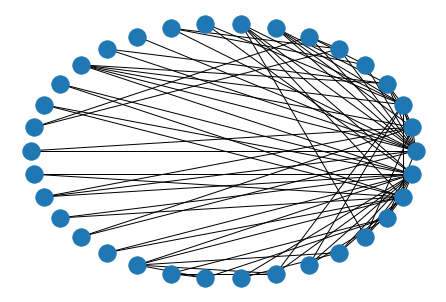

<Figure size 432x288 with 0 Axes>

In [14]:
#Visualization of Zachary's Karate club:
nx.draw_circular(kn)
plt.show()
plt.savefig('networkx_circular_karate.png')

### Creating the adjustancy matrix for the graph data: 

In [15]:
gt_dict = nx.get_node_attributes(kn, 'club')
gt = [gt_dict[i] for i in kn.nodes()]
gt = np.array([0 if i == 'Mr. Hi' else 1 for i in gt])

In [16]:
print("The original club before the fission: \n")

for i in gt:
    if(i):
        print("Officers")
    else:
        print("Mr. Hi's")

The original club before the fission: 

Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Officers
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Officers
Officers
Mr. Hi's
Mr. Hi's
Officers
Mr. Hi's
Officers
Mr. Hi's
Officers
Officers
Officers
Officers
Officers
Officers
Officers
Officers
Officers
Officers
Officers
Officers


In [17]:
# Get adjacency-matrix as numpy-array
adj_mat = nx.to_numpy_matrix(kn)

print("The adjustancy matrix looks like: \n", adj_mat)

The adjustancy matrix looks like: 
 [[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


### Spectral Clustering

In [18]:
# Applying the spectral clustering 
sc = SpectralClustering(2, affinity='nearest_neighbors')
sc.fit(adj_mat)

c:\python37\lib\site-packages\sklearn\cluster\spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=2, n_init=10,
                   n_jobs=None, n_neighbors=10, random_state=None)

In [19]:
# Displaying the clustering results: 
print(sc.labels_)


[1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


### For better clustering results tuning the parameters of classifier.

In [20]:
sc = SpectralClustering(2, affinity='nearest_neighbors',n_init=100, assign_labels='discretize')
sc.fit(adj_mat)

c:\python37\lib\site-packages\sklearn\cluster\spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


SpectralClustering(affinity='nearest_neighbors', assign_labels='discretize',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=2, n_init=100,
                   n_jobs=None, n_neighbors=10, random_state=None)

In [21]:
# Storing the clustering results: 
class_labels = sc.labels_

class_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Displaying the results generated by Spectral Clustering which are almost exact as indicated in the document:

http://aris.ss.uci.edu/~lin/76.pdf

In [22]:
print("The club after the fission: \n")


for i in class_labels:
    if(i):
        print("Officers")
    else:
        print("Mr. Hi's")

The club after the fission: 

Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Officers
Officers
Mr. Hi's
Mr. Hi's
Mr. Hi's
Mr. Hi's
Officers
Officers
Mr. Hi's
Mr. Hi's
Officers
Mr. Hi's
Officers
Mr. Hi's
Officers
Officers
Officers
Officers
Officers
Officers
Officers
Officers
Officers
Officers
Officers
Officers
